In [1]:
import numpy as np
import seaborn as sns

from pathlib import Path
from PIL import Image
from joblib import Parallel, delayed

In [2]:
ds_root = Path('./dataset/rtsd-r3')

In [3]:
def handle_img(p):
#     im = Image.open(p)
#     return im.size
    return p.stat().st_size

    
res = Parallel(n_jobs=-1)(delayed(handle_img)(p) for p in ds_root.glob('*/*.png'))


In [4]:
sizes = np.array(res)
# Предположим, что изображения в рассматриваемом наборе данных
# большей частью квадратной формы, а на кодирование цвета одного
# пикселя требуется 3 байта. Тогда справедлива формула a = sqrt(s / 3),
# где a - размер стороны изображения в пикселях, s - размер изображения
# в байтах
sizes = np.sqrt(sizes / 3)

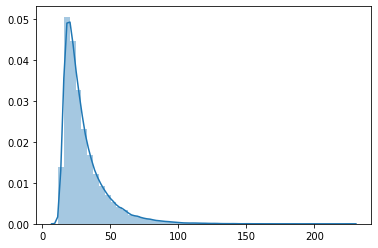

In [5]:
sns.distplot(sizes);

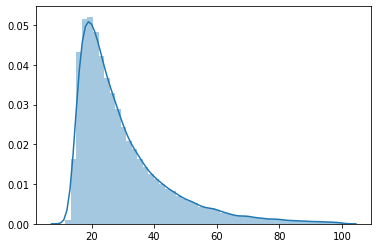

In [6]:
sns.distplot(sizes[sizes <= 100]);

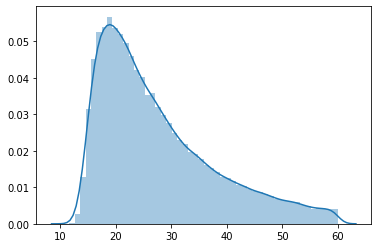

In [7]:
sns.distplot(sizes[sizes <= 60]);

In [8]:
le_64_count = len(sizes[sizes <= 64])
gt_64_count = len(sizes[sizes > 64])
le_64_count, gt_64_count

(89510, 4144)

In [10]:
f'{gt_64_count / le_64_count * 100:.2f}%'

'4.63%'